age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
me

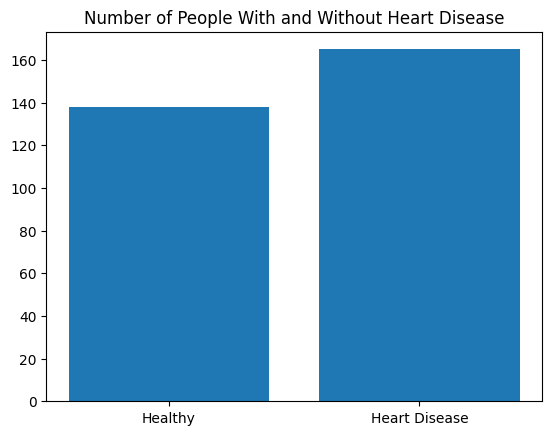

In [6]:
# 2.1 Preprocess the raw data

#     Check whether there are missing values
#     Check whether theare are cateogrical features
#     Check whether this dataset is balanced or not (use the bar plot to visualize the number of positive and negative samples)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

df = pd.read_csv('heart.csv')

print(df.isnull().sum())
print('\nThere are no missing values\n')

print(df.info())
print('\nThere are no categorical values\n')

plt.bar(df['target'].value_counts().index, df['target'].value_counts().values, tick_label=['Heart Disease', 'Healthy'])
plt.title('Number of People With and Without Heart Disease')
print('\nThe dataset is balanced\n')

In [8]:
# 2.2 Split the data into two subsets and normalize the features of samples

#     Split the dataset into the train_val set and testing set.
#     Normalize features

heartData = df.drop('target', axis=1).values
heartDisease = df['target'].values
X_train_val, X_test, y_train_val, y_test = train_test_split(heartData, heartDisease, 
                                                            test_size=0.14, 
                                                            random_state=0)

print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

train_val: 260, test: 43


In [10]:

# 2.3 Train the KNN model and select the hyperparameter with cross-validation

#     Use the 5-fold cross-validation to select the hyperparameter K. 
#     Search K from {1, 2, 3, 4, 5}

k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_val, y_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.8038461538461539
{'n_neighbors': 3}


In [14]:
# 2.4 Evaluate the learned model

#     Report the prediction accuracy, recall, precision, and F1 score.

clf_knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
macro_f1 = f1_score(y_test, y_test_pred, average='macro')
micro_f1 = f1_score(y_test, y_test_pred, average='micro')
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f}, micro f1: {:.3f}, macro f1: {:.3f}".format(acc, recall, precision, f1, micro_f1, macro_f1))



accuracy: 0.837, recall: 0.857, precision: 0.818, f1: 0.837, micro f1: 0.837, macro f1 0.837
